Neural network machine learning project with the MNIST Handwritten Digit *Classification*

In [1]:
!pip install opencv-python

In [6]:
#Importing the Dependencies and Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [7]:
#Loading the MNIST data from keras.datasets
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [8]:
type(X_train)

numpy.ndarray

In [9]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)



Split of Train-test data

Training data = 60,000 Images

Test data = 10,000 Images

Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [10]:
# printing the 11th image

print(X_train[11])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  31  40 129 234 234 159   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [11]:
print(X_train[11].shape)

(28, 28)


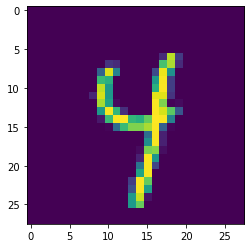

4


In [12]:
# displaying the image

plt.imshow(X_train[26])
plt.show()

# print the corresponding label
print(Y_train[26])

In [13]:
# Image labels
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [14]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [15]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [16]:
# printing the 11th image

print(X_train[11])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network using different activation functions

In [17]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [18]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2929 - accuracy: 0.9126
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1330 - accuracy: 0.9601
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0984 - accuracy: 0.9701
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0787 - accuracy: 0.9757
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0648 - accuracy: 0.9795
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0579 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0486 - accuracy: 0.9850
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0435 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0372 - accuracy: 0.9880
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.033

In [20]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1036 - accuracy: 0.9738
0.973800003528595


Test data accuracy = 97.1%

In [21]:
print(X_test.shape)

(10000, 28, 28)


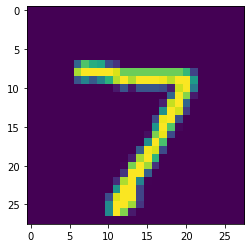

In [22]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [23]:
print(Y_test[0])

7


In [24]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [25]:
print(Y_pred.shape)

(10000, 10)


In [26]:
print(Y_pred[0])

[1.8059682e-03 2.0309713e-02 3.6434379e-01 7.5326753e-01 5.6753560e-08
 8.2064914e-03 1.7527628e-06 9.9999940e-01 1.1654803e-02 2.2345548e-03]


model.predict() gives the prediction probability of each class for that data point

In [27]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [28]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

Confusin Matrix

In [29]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [30]:
print(conf_mat)

tf.Tensor(
[[ 969    1    0    1    1    1    1    2    2    2]
 [   0 1125    2    3    0    1    2    0    2    0]
 [   6    1 1005    5    4    2    2    2    4    1]
 [   0    0    0  989    0   12    0    6    1    2]
 [   2    1    3    0  953    3    4    5    2    9]
 [   2    0    0    9    1  872    2    1    2    3]
 [   2    2    0    1    4    9  938    0    1    1]
 [   1    5   10    1    2    0    0 1000    6    3]
 [   7    0    5   11    4   19    2    5  910   11]
 [   2    4    0    4   10    5    0    5    2  977]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

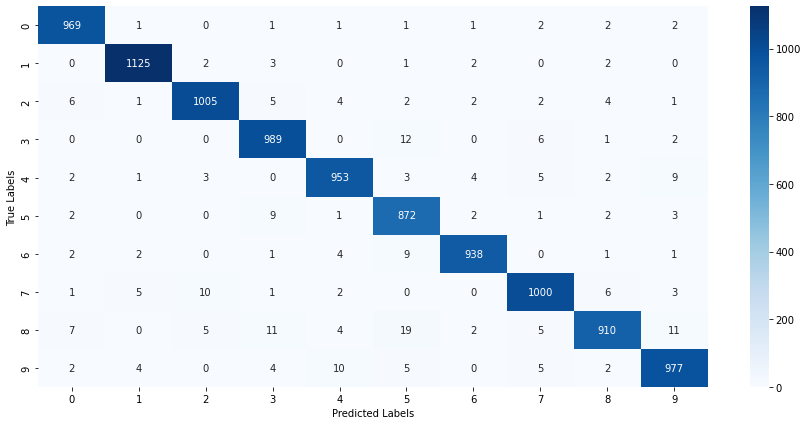

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [32]:
# Connect to drive
# from google.colab import drive
# drive.mount('/content/drive')

In [33]:
#Path of input file
input_image_path = 'Digit_for_test.png'

input_image = cv2.imread(input_image_path)

In [34]:
type(input_image)

numpy.ndarray

In [35]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [36]:
cv2.imshow("handwritten digit", input_image)
cv2.waitKey(0)

-1

In [37]:
input_image.shape

(318, 318, 3)

In [38]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [39]:
grayscale.shape

(318, 318)

In [40]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [41]:
input_image_resize.shape

(28, 28)

In [42]:
cv2.imshow("Resized image",input_image_resize)
cv2.waitKey(0)

-1

In [43]:
input_image_resize = input_image_resize/255

In [44]:
type(input_image_resize)

numpy.ndarray

In [45]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [46]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 142ms/step
[[1.40816299e-02 1.75624136e-02 1.12695005e-02 1.00000000e+00
  3.38513028e-12 9.98986125e-01 2.57592370e-09 6.60788715e-02
  3.83239426e-02 9.32021737e-01]]


In [47]:
input_pred_label = np.argmax(input_prediction)

In [48]:
print(input_pred_label)

3


Prediction of handwritten digits

In [50]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2.imshow("output image", input_image)
cv2.waitKey(0)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

Path of the image to be predicted: Digit_for_test.png
1/1 [==============================] - 0s 24ms/step
The Handwritten Digit is recognised as  3
